In [24]:
import pandas as pd
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from financial_news import NewsDataLoader, NewsAnalyzer

# Ensure NLTK resources are available
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
try:
    nltk.data.find('tokenizers/punkt/english.pickle')
    print("NLTK 'punkt' tokenizer is available.")
except LookupError:
    print("NLTK 'punkt' tokenizer not found. Please check NLTK data installation.")

NLTK 'punkt' tokenizer is available.


In [25]:
# Define directories
PLOTS_DIR = '../plots'
DATA_DIR = '../data'
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

# Load data
news_loader = NewsDataLoader('../data/raw_analyst_ratings.csv')
news_df = news_loader.load()
print("First 5 rows of the dataset:")
print(news_df.head())

# Initialize analyzer
analyzer = NewsAnalyzer(news_df)

# Descriptive statistics
stats = analyzer.get_basic_stats()
print("\nBasic Statistics:")
print(stats)

DEBUG: [NewsDataLoader.load] Attempting to load: ../data/raw_analyst_ratings.csv
DEBUG: [NewsDataLoader.load] CSV loaded. Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
DEBUG: [NewsDataLoader.load] Initial 'date' column dtype: object
DEBUG: [NewsDataLoader.load] First 5 'date' values (raw): ['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00', '2020-05-26 04:30:07-04:00', '2020-05-22 12:45:06-04:00', '2020-05-22 11:38:59-04:00']
DEBUG: [NewsDataLoader.load] Attempting explicit pd.to_datetime on 'date' column.
DEBUG: [NewsDataLoader.load] After explicit pd.to_datetime, 'date' column dtype: datetime64[ns, UTC-04:00]
DEBUG: [NewsDataLoader.load] First 5 'date' values (after parse): [Timestamp('2020-06-05 10:30:54-0400', tz='UTC-04:00'), Timestamp('2020-06-03 10:45:20-0400', tz='UTC-04:00'), Timestamp('2020-05-26 04:30:07-0400', tz='UTC-04:00'), Timestamp('2020-05-22 12:45:06-0400', tz='UTC-04:00'), Timestamp('2020-05-22 11:38:59-0400', tz='UTC-04:00')]
DEBUG

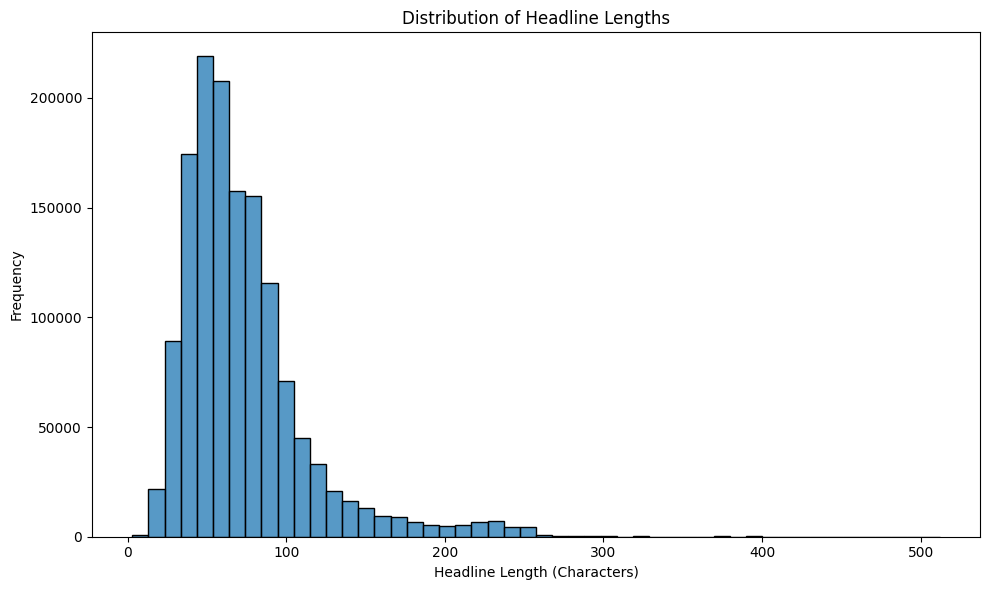

In [26]:
# Headline length distribution
plt.figure(figsize=(10, 6))
sns.histplot(news_df['headline'].str.len(), bins=50)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (Characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'headline_length_distribution.png'))
plt.show()


Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


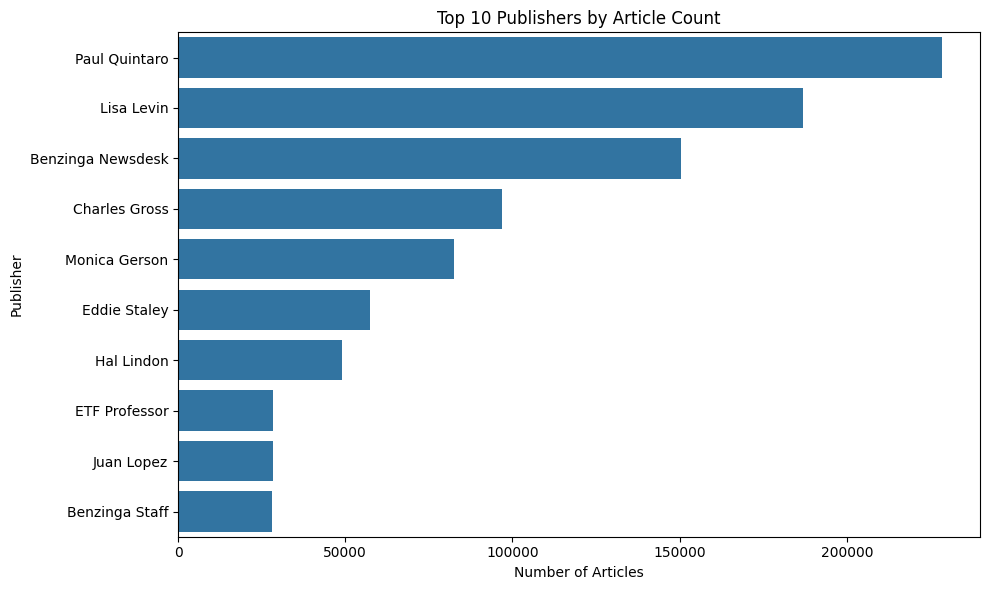

In [27]:
# Publisher analysis
top_publishers = analyzer.analyze_publishers(top_n=10)
print("\nTop 10 Publishers:")
print(top_publishers)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'publisher_distribution.png'))
plt.show()


Top 10 Publisher Domains:
publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


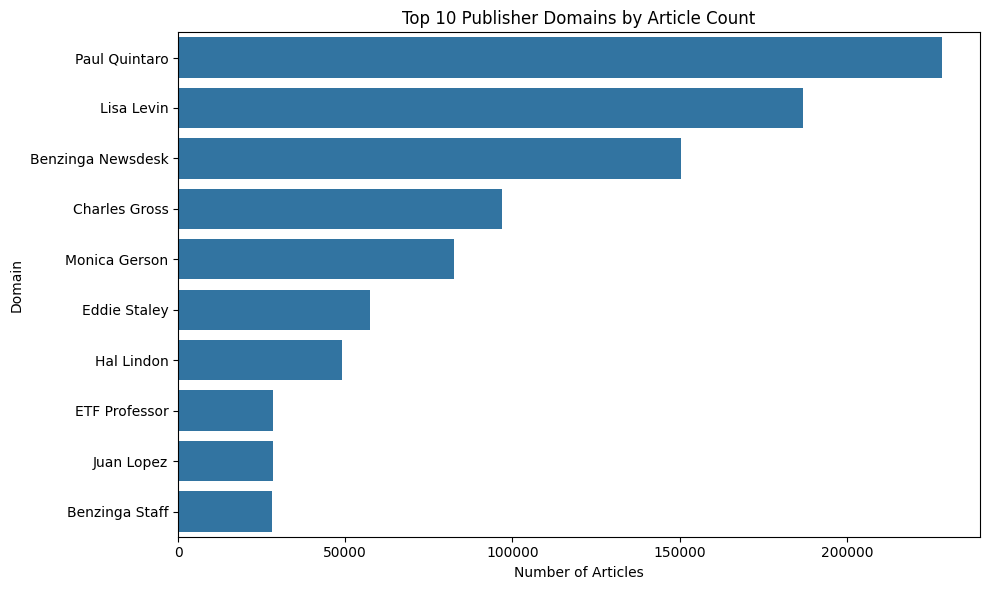

In [28]:
# Publisher domain analysis
def extract_domain(publisher):
    if not isinstance(publisher, str):
        return 'Unknown'
    if '@' in publisher:
        return publisher.split('@')[1]
    return publisher

news_df['publisher_domain'] = news_df['publisher'].apply(extract_domain)
domain_counts = news_df['publisher_domain'].value_counts().head(10)
print("\nTop 10 Publisher Domains:")
print(domain_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.values, y=domain_counts.index)
plt.title('Top 10 Publisher Domains by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'domain_distribution.png'))
plt.show()

In [29]:
# Temporal distribution
daily, hourly = analyzer.plot_temporal_distribution(save_path=os.path.join(PLOTS_DIR, 'temporal_distribution.png'))
print("\nDaily Publication Summary:")
print(daily.describe())
print("\nHourly Publication Summary:")
print(hourly.describe())

# Identify publication spikes
daily_mean = daily.mean()
daily_std = daily.std()
spike_threshold = daily_mean + 2 * daily_std
spikes = daily[daily > spike_threshold]
print("\nDays with Publication Spikes:")
print(spikes)


Daily Publication Summary:
count    3334.000000
mean       16.792741
std        60.088398
min         0.000000
25%         1.000000
50%         5.000000
75%        14.000000
max       973.000000
dtype: float64

Hourly Publication Summary:
count      24.000000
mean     2332.791667
std      2421.401283
min        14.000000
25%        90.250000
50%      1720.500000
75%      4212.500000
max      7669.000000
Name: count, dtype: float64

Days with Publication Spikes:
date
2020-01-22 00:00:00-04:00    150
2020-02-27 00:00:00-04:00    275
2020-02-28 00:00:00-04:00    381
2020-03-05 00:00:00-04:00    138
2020-03-06 00:00:00-04:00    281
                            ... 
2020-06-05 00:00:00-04:00    932
2020-06-08 00:00:00-04:00    765
2020-06-09 00:00:00-04:00    804
2020-06-10 00:00:00-04:00    806
2020-06-11 00:00:00-04:00    544
Length: 61, dtype: int64



Top 20 Most Common Words in Headlines:
[('stocks', 161702), ('vs', 138835), ('eps', 128801), ('est', 122289), ('reports', 108688), ('update', 91645), ('earnings', 87183), ('sales', 79528), ('top', 78493), ('benzinga', 74466), ('pt', 73059), ('announces', 66531), ('price', 64217), ('buy', 63928), ('downgrades', 61942), ('trading', 61146), ('raises', 57793), ('upgrades', 56802), ('target', 54669), ('maintains', 52960)]


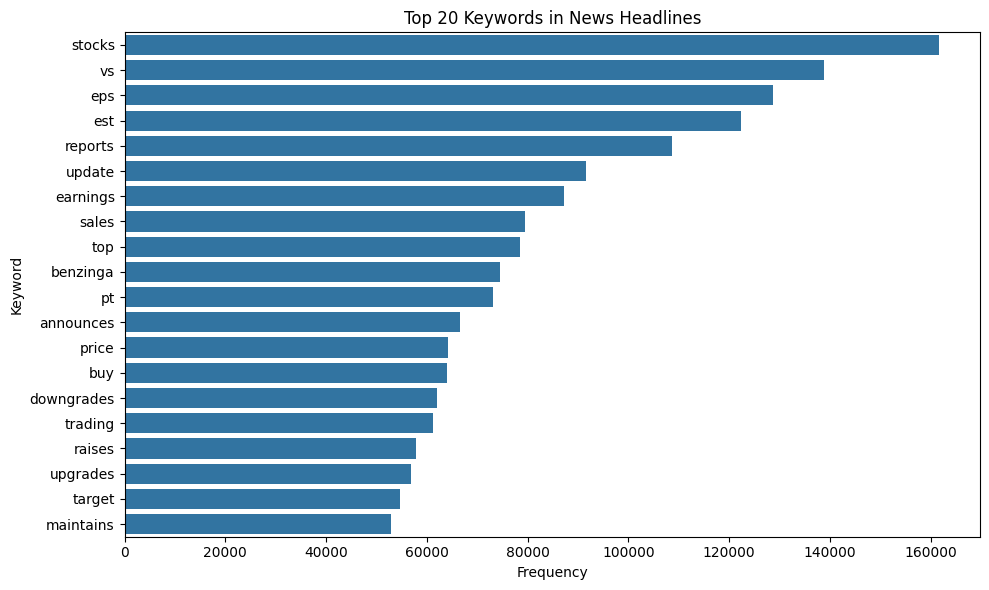

In [30]:
# Text analysis
financial_stopwords = {'stock', 'market', 'company', 'shares'}
stop_words = set(stopwords.words('english')).union(financial_stopwords)

def clean_text(text):
    if not isinstance(text, str):
        return []
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

news_df['tokens'] = news_df['headline'].apply(clean_text)
all_tokens = [token for tokens_list in news_df['tokens'] for token in tokens_list if isinstance(tokens_list, list)]
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(20)
print("\nTop 20 Most Common Words in Headlines:")
print(common_words)

if common_words:
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words)
    plt.title('Top 20 Keywords in News Headlines')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, 'keyword_frequency.png'))
    plt.show()
else:
    print("No common words found to plot.")

In [31]:
# Save processed DataFrame
output_path = os.path.join(DATA_DIR, 'processed_news_data.pkl')
news_df.to_pickle(output_path)
print(f"Saved processed DataFrame to {output_path}")

Saved processed DataFrame to ../data\processed_news_data.pkl
